# <div align="center"> İSTANBUL ÜNİVERSİTESİ-CERRAHPAŞA </div>
## <div align="center"> MÜHENDİSLİK FAKÜLTESİ - BİLGİSAYAR MÜHENDİSLİĞİ BÖLÜMÜ </div>
### <div align="center"> VERI BILIMI KULLANARAK KREDI KARTI DOLANDIRICILIĞITESPITI </div>

#### Aşağıdaki komut, Bulut sistemine yüklediğim veri setini getiren otomatik bir komuttur.

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_8ee5bad798714e8f832e06e9035cd665 = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_8ee5bad798714e8f832e06e9035cd665 = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_8ee5bad798714e8f832e06e9035cd665 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='EGUjcTPirKzeKrSUHTuLFH_02O8n6JovehBSXoCxa3Kq',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_8ee5bad798714e8f832e06e9035cd665)

body = client_8ee5bad798714e8f832e06e9035cd665.get_object(Bucket='graduationproject-donotdelete-pr-nimlvalsxkiabm',Key='creditcard.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 0.1 Proje Açıklaması

Normal bir şirket, dolandırıcılık nedeniyle yıllık gelirinin tahmini %5'ini kaybeder. 
Bu projede, verileri kullanarak dolandırıcılığı engellemeyi öğreneceğiz. genellikle geçmiş dolandırıcılığa dayalı dolandırıcılık davranışlarını tespit etmek için *supervised* öğrenme algoritmaları uygularız ve yeni dolandırıcılık etkinliklerini keşfetmek için *unsupervised* öğrenme yöntemlerini kullanırız.

Dolandırıcılık işlemleri normla karşılaştırıldığında nadirdir. Bu nedenle, dengesiz veri setlerini uygun şekilde sınıflandırmayı öğreneceğiz.

Proje, teknik ve teorik bilgiler sağlar ve dolandırıcılık tespit modellerinin nasıl uygulanacağını gösterir.

In [6]:
#pip install imblearn
#pip install gensim
#pip install python-Levenshtein

### Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN

import gensim
from gensim import corpora

In [7]:
df_data_1.shape

(284807, 31)

Veri setimiz (284.807) satır ve (31) sütun içeriyor.

## 1. Verilerin tanıtılması ve hazırlanması

### 1.1 Dolandırıcılık / dolandırıcılık olmayan oranının kontrol edilmesi

In [8]:
df = df_data_1

In [9]:
occ = df['Class'].value_counts()
occ

0    284315
1       492
Name: Class, dtype: int64

In [11]:
ratio_cases = occ/len(df.index)
print(f'Dolandırıcılık işlemleri: {ratio_cases[1]}\nDolandırıcılık olmayan işlemleri: {ratio_cases[0]}')

Dolandırıcılık işlemleri: 0.001727485630620034
Dolandırıcılık olmayan işlemleri: 0.9982725143693799


**Dolandırıcılık işlemlerinin oranı çok düşük. Bu bir sınıf dengesizliği**

### 1.2 Veri görselleştirme
**df veri setinde dolandırıcılık içermeyen veri noktalarına oranını görselleştirmek için bir grafik oluşturacağız.**

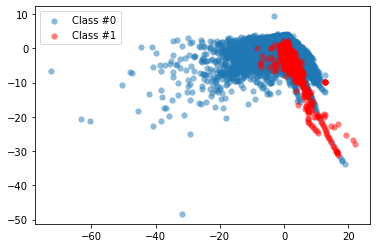

In [12]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
     Veri kümesini iki değişkene dönüştürme
     X: veri sütunları (V1 - V28)
     y: etiket sütunu
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

X, y = prep_data(df)
plot_data(X, y)

### 1.3 Veri örnekleme (*resampling*) ile başarılı tespitleri edinme
**1.3.0 Python *imblean* modülünü kullanarak örnekleme yöntemlerini uygulamak**

In [20]:
from imblearn.over_sampling import RandomOverSampler

method = RandomOverSampler()
X_resampled, y_resampled =  method.fit_resample(X, y)


#### 1.3.1 Synthetic minority Oversampling Technique (SMOTE)

In [23]:
method = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

X_resampled, y_resampled = method.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_resampled, y_resampled)

predicted = model.predict(X_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.08      0.93      0.15       101

    accuracy                           0.98     56962
   macro avg       0.54      0.96      0.57     56962
weighted avg       1.00      0.98      0.99     56962



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


X shape: (284807, 28)
y shape: (284807,)


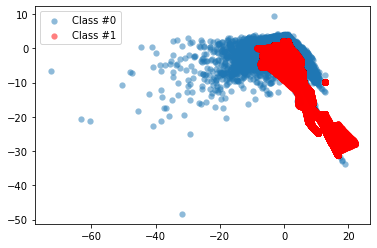

In [25]:
X, y = prep_data(df)
print(f'X shape: {X.shape}\ny shape: {y.shape}')
method = SMOTE()
X_resampled, y_resampled = method.fit_resample(X, y)
plot_data(X_resampled, y_resampled)

#### 1.3.2 SMOTE'u orijinal verilerle karşılaştırma

In [28]:
pd.value_counts(pd.Series(y))

0    284315
1       492
dtype: int64

In [29]:
pd.value_counts(pd.Series(y_resampled))

1    284315
0    284315
dtype: int64

**Artık SMOTE'un verilerimizi tamamen dengelediği ve azınlık sınıfının artık çoğunluk sınıfına eşit büyüklükte olduğu açıktır. Verilerin görselleştirilmesi veriler üzerindeki etkiyi çok net bir şekilde gösterir. Bir sonraki adım, SMOTE'u uygulamanın birçok yolunu gösterecek ve her yöntemin biraz farklı bir etkisi olacaktır.**

In [30]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

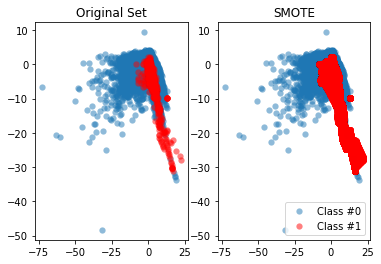

In [31]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

### 1.4 Dolandırıcılık tespit algoritmaları (*Linear Regression*)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
r2_score(y_test, y_predicted)

0.5663489329828586

In [40]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [41]:
df['flag_as_fraud'] = np.where(np.logical_and(df.V1 < -3, df.V3 < -5), 1, 0)

In [42]:
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])

Flagged Fraud,0,1
Actual Fraud,,
0,283089,1226
1,322,170


Bu durumla birlikte 492 dolandırıcılık işlemi 170'si tespit ediliyor,
<br>322 tespit edilmedi ve 1226 yanlış pozitif tespit edildi.

### 1.3.3 Dolandırıcılığı tespit etmek için makine öğrenimi sınıflandırmasını kullanmak (*Logistic Regression*)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    12]
 [   56    91]]


### 1.3.4 SMOTE ile *Logistic Regression*

In [44]:
resampling = BorderlineSMOTE()
model = LogisticRegression(solver='liblinear')
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

### 1.3.5 Pipelining

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.19      0.86      0.31       147

    accuracy                           0.99     85443
   macro avg       0.60      0.93      0.66     85443
weighted avg       1.00      0.99      1.00     85443

Confusion matrix:
 [[84761   535]
 [   20   127]]
